In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
policestop = pd.read_csv("cleaned_eda.csv")

In [26]:
policestop.head(5)

,Unnamed: 0,Citation,EntryDate,StopDTS,StopCause,ViolationNumber,SpecialCondition,Race,Gender,ExitVehicle,...,EntryYear,EntryDayofMonth,EntryDayofWeek,EntryHour,StopMonth,StopYear,StopDayofMonth,StopDayofWeek,StopHour,Age
0,0,False,2017-07-06 05:04:02+00:00,2017-07-06 04:58:00+00:00,MOVING OR HAZARDOUS VIOLATION OF VEHICLE CODE,22108,NOT APPLICABLE,ASIAN/PACIFIC ISLANDER,F,False,...,2017,6,3,22,7,2017,6,3,21,24.0
1,1,False,2017-07-06 05:46:55+00:00,2017-07-06 05:41:00+00:00,MOVING OR HAZARDOUS VIOLATION OF VEHICLE CODE,22450,NOT APPLICABLE,AFRICAN AMERICAN,F,False,...,2017,6,3,22,7,2017,6,3,22,23.0
2,2,False,2017-07-06 06:05:59+00:00,2017-07-06 05:57:00+00:00,REGISTRATION OR REQUIRED EQUIPMENT VIOLATION,24616,NOT APPLICABLE,AFRICAN AMERICAN,M,False,...,2017,6,3,23,7,2017,6,3,22,28.0
3,3,False,2017-07-06 06:06:16+00:00,2017-07-06 05:13:00+00:00,REGISTRATION OR REQUIRED EQUIPMENT VIOLATION,4000,NOT APPLICABLE,AFRICAN AMERICAN,F,False,...,2017,6,3,23,7,2017,6,3,22,48.0
4,4,False,2017-07-06 06:15:39+00:00,2017-07-06 06:02:00+00:00,REGISTRATION OR REQUIRED EQUIPMENT VIOLATION,24600,NOT APPLICABLE,AFRICAN AMERICAN,M,False,...,2017,6,3,23,7,2017,6,3,23,21.0


## Analyzing Temporal Data

When we cleaned the data, we split our StopDTS column into several columns, including hour, month, day of week, and year. Let's explore this data even further, and see how this data might affect things like citations and arrests

In [27]:
policestop['StopYear'].value_counts()

2018    31839
2017    18013
2019       22
Name: StopYear, dtype: int64

Our data seems inconsistent; while we have a lot of data from 2018, which is most likely representative of the whole year, our data from 2017 contains half that data, and there are only 22 values from 2019. Therefore, it might be in our best interest to solely analyze data from 2018 just for certain temporal metrics -  values like month could be skewed based on what values were taken from 2017.

In [28]:
policestop2017 = policestop[policestop['StopYear'] == 2017]
policestop2017['StopMonth'].value_counts()

12    2847
10    2757
7     2752
8     2719
11    2512
9     2483
6     1943
Name: StopMonth, dtype: int64

In [29]:
policestop2019 = policestop[policestop['StopYear'] == 2019]
policestop2019['StopMonth'].value_counts()

1    22
Name: StopMonth, dtype: int64

In [30]:
#policestopdata for 2017 and 2018 only
policestop2017and2018 = policestop[policestop['StopYear'].isin([2017, 2018])]

Indeed, it seems like we only have data from June onwards in 2017. In addition, we only have 22 values in 2019 (all in January), so we need to be careful of any unintentional skew we might have. Lets just analyze what months you were most likely to be pulled over in 2018.

In [31]:
policestop2018 = policestop[policestop['StopYear'] == 2018]
stopMonth2018 = policestop2018['StopMonth'].value_counts()

Text(0, 0.5, 'Cars Pulled Over')

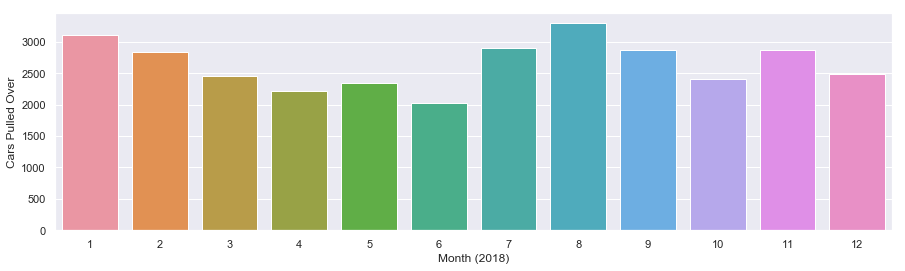

In [32]:
sns.set()
plt.figure(figsize=(15,4))
sns.barplot(stopMonth2018.index, stopMonth2018.values)
plt.xlabel("Month (2018)")
plt.ylabel("Cars Pulled Over")

It is interesting how out of the top 3 months that police stop vehicles, 2 of them are July and August. 

In [33]:
stopdayofMonth = policestop2018['StopDayofMonth'].value_counts()

Text(0, 0.5, 'Cars pulled over')

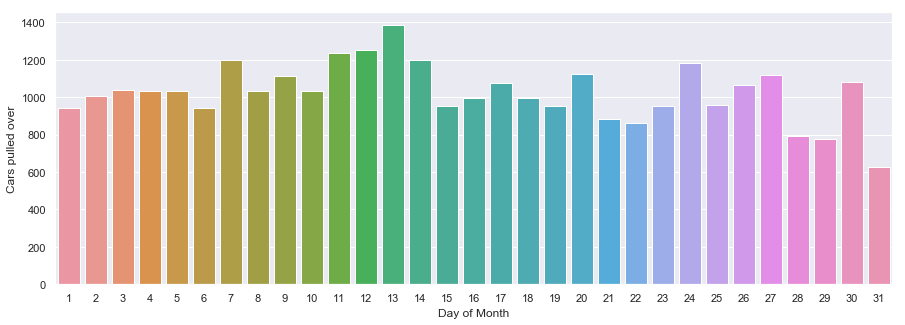

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(stopdayofMonth.index, stopdayofMonth.values)
plt.xlabel("Day of Month")
plt.ylabel("Cars pulled over")

According to this bar plot, it seems like you are more likely to be pulled over in the first half of the month vs the end of the month, the highest values are days 12 and 13.

In [45]:
policestop2018.columns

Index(['Unnamed: 0', 'Citation', 'EntryDate', 'StopDTS', 'StopCause',
       'ViolationNumber', 'SpecialCondition', 'Race', 'Gender', 'ExitVehicle',
       'PassengerCount', 'SearchDriver', 'SearchPassenger', 'SearchVehicle',
       'Authority', 'ConsentRequested', 'ConsentGranted', 'FSWeapons',
       'FSDrugs', 'FSCash', 'FSVehicle', 'FSAlcohol', 'FSOtherProperty',
       'FSNothing', 'ResultCitation', 'ResultArrest', 'ResultReport',
       'ResultAdvised', 'ResultFC', 'CadCallNumber', 'DetentionDuration',
       'OfficerAbra', 'LimitedLanguage', 'EntryMonth', 'EntryYear',
       'EntryDayofMonth', 'EntryDayofWeek', 'EntryHour', 'StopMonth',
       'StopYear', 'StopDayofMonth', 'StopDayofWeek', 'StopHour', 'Age'],
      dtype='object')

Text(0, 0.5, 'Amount')

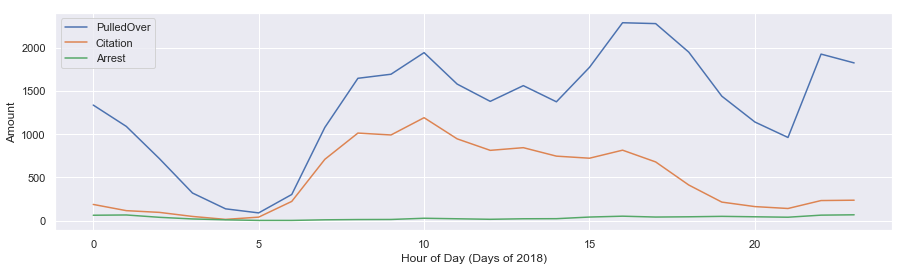

In [46]:
#Convert UTC to PACIFIC TIME
policestop2018['StopDTS'] = pd.to_datetime(policestop2018['StopDTS'])
newstop = pd.DataFrame(policestop2018['StopDTS'])
newstop.set_index(policestop2018['StopDTS'], inplace=True)
newstop.index = newstop.index.tz_convert('America/Los_Angeles')
newstop['hour'] = newstop.index.hour
policestop2018.loc[:, 'StopHour'] = newstop.index.hour

stopHour = policestop2018['StopHour'].value_counts()
citations = policestop2018.groupby('StopHour').agg({'ResultCitation': 'sum', 'ResultArrest': 'sum'})
plt.figure(figsize=(15,4))
sns.set()
sns.lineplot(stopHour.index, stopHour.values, label="PulledOver")
sns.lineplot(citations.index, citations['ResultCitation'], label="Citation")
sns.lineplot(citations.index, citations['ResultArrest'], label="Arrest")
plt.xlabel("Hour of Day (Days of 2018)")
plt.ylabel("Amount")

What an interesting line plot! While it seems you are most likely to be pulled over at around the 16th hour of the day (around 8.pm.), you are actually more likely to get a citation from 8-10 a.m., even though you are less likely to be pulled over at that time.

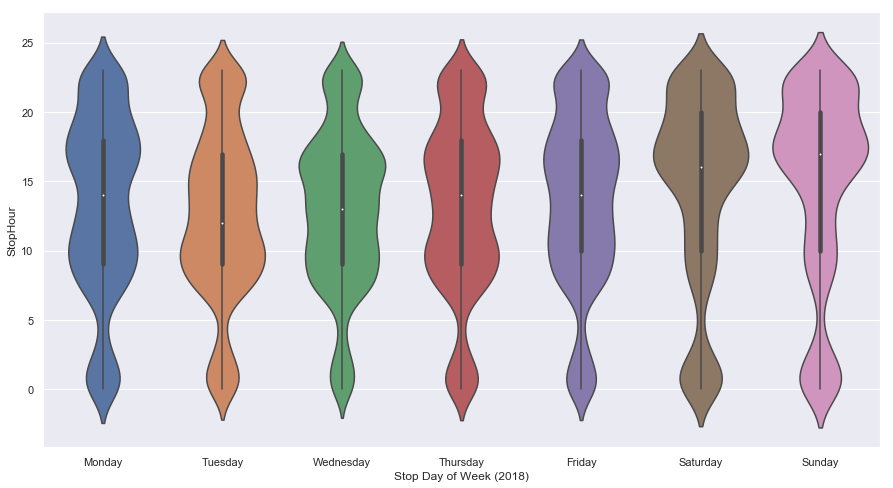

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
a = sns.violinplot(x='StopDayofWeek', y='StopHour',data=policestop2018)
a.set_xticklabels(days_of_week)
plt.xlabel("Stop Day of Week (2018)")
plt.show()

The visualization is interesting because we observe that the later days of
the week, namely Saturday and Sunday have a higher frequency of stops that happen earlier and later in the day as compared to earlier days of the week. In addition, the lower bound of the interquartile range starts at a higher hour for the weekends as compared to earlier days. When explaining to lay person, we would say this visualization shows us 7 violin plots for each day of the week, where the thickness at each hour represents the frequency of stops and the center dot at each value represents the median hour for stops

## Analyzing Data throught the lens of Race

Are people who are of a certain race more likely to be pulled over? Let's analyze this in more detail


In [19]:
policestoprace = policestop.groupby('Race').agg({'ResultCitation': 'sum'})
policestoprace['Arrest'] = policestop.groupby('Race').agg({'ResultArrest': 'sum'})
policestoprace['Citation or Arrest'] = policestoprace['ResultCitation'] + policestoprace['Arrest']
policestoprace['PulledOver'] = policestop.groupby('Race').agg({'ResultCitation': 'size'})
policestoprace

,ResultCitation,Arrest,Citation or Arrest,PulledOver
Race,,,,
AFRICAN AMERICAN,4519.0,489.0,5008.0,16787
AM. IND./AL. NATIVE,73.0,3.0,76.0,99
ASIAN INDIAN,41.0,0.0,41.0,47
ASIAN OTHER,1022.0,3.0,1025.0,1228
ASIAN/PACIFIC ISLANDER,238.0,52.0,290.0,2063
CAMBODIAN,1.0,0.0,1.0,1
CHINESE,6.0,0.0,6.0,7
CUBAN/CARRIBEAN,9.0,0.0,9.0,9
EAST INDIAN,163.0,0.0,163.0,191


According to https://www.census.gov/quickfacts/fact/table/sacramentocitycalifornia,US/PST045218 , in 2018  33.1% percent of Sacramento was white alone (not Hispanic or Latino), 13.4% of Sacramento was Black, 18.7% of Sacramento was Asian, and 28.3% were Hispanic, and the rest (around 8 percent) were other, whether they be mixed race, Native American, or Hawaiian. 

Ideally, we would have population stats for each of the categories above, but for the sake of simplicity lets modify the data above to shrink the data down to these categories to better see if stops are representative of the population as a whole. 


Note 1: I am omitting the "UNKNOWN" category as this is missing data.

Note 2: These population statistics are general population statistics, not the population statistics of drivers that are of age, so any interpretations should be taken with a grain of salt. In addition, it is important to account there could be many confounding variables that lead to the following results.

In [18]:
mappings = {  'AFRICAN AMERICAN': 'AFRICAN AMERICAN', 'AM. IND./AL. NATIVE': 'OTHER',  'ASIAN INDIAN': 'ASIAN',
        'ASIAN OTHER': 'ASIAN', 'ASIAN/PACIFIC ISLANDER': 'ASIAN', 'CAMBODIAN': 'ASIAN', 'CHINESE': 'ASIAN', 
            'CUBAN/CARRIBEAN': 'OTHER', 'EAST INDIAN': 'ASIAN', 'FILIPINO': 'ASIAN', 'GUAMANIAN': 'OTHER', 'HAWAIIAN':'OTHER',
            'HISPANIC': 'HISPANIC', 'HMONG': 'ASIAN', 'JAPANESE': 'ASIAN', 'MIDDLE EASTERN': 'ASIAN', 'MIXED RACE': 'OTHER',
            'NATIVE AMERICAN': 'OTHER',   'ORIENTAL/ASIAN': 'ASIAN', 'OTHER/NOT APPARENT': 'OTHER', 'PACIFIC ISLANDER': 'OTHER',
            'SAMOAN': 'OTHER', 'VIETNAMESE': 'ASIAN', 'VIETNAMESE': 'ASIAN', 'WHITE': 'WHITE'}
           
policestoprace = policestop.copy()
policestoprace['Race'] = policestoprace['Race'].map(mappings)

policestoprace_group = policestoprace.groupby('Race').agg({'ResultCitation': 'sum'})
policestoprace_group['PulledOver'] = policestoprace.groupby('Race').agg({'ResultCitation': 'size'})
policestoprace_group['Arrest'] = policestoprace.groupby('Race').agg({'ResultArrest': 'sum'})
policestoprace_group['ResultCitation or Arrest/PulledOver'] = (policestoprace_group['ResultCitation'] +  policestoprace_group['Arrest']) / policestoprace_group['PulledOver']
policestoprace_group['PercentageofPop'] = [.134, .187, .283, .065, .331]
policestoprace_group['RateStopped'] = policestoprace_group['PulledOver']/ sum(policestoprace_group['PulledOver'])

searchDriver = policestoprace.groupby('Race').agg({'SearchDriver': 'sum'}).values
searchVehicle = policestoprace.groupby('Race').agg({'SearchVehicle': 'sum'}).values
searchPassenger = policestoprace.groupby('Race').agg({'SearchPassenger': 'sum'}).values
policestoprace_group['Searched'] = searchPassenger  + searchVehicle + searchDriver
policestoprace_group['PercentageSearched']  = policestoprace_group['Searched']/ (policestoprace_group['PulledOver'])
policestoprace_group

,ResultCitation,PulledOver,Arrest,ResultCitation or Arrest/PulledOver,PercentageofPop,RateStopped,Searched,PercentageSearched
Race,,,,,,,,
AFRICAN AMERICAN,4519.0,16787,489.0,0.298326,0.134,0.345021,7858.0,0.468100
ASIAN,1515.0,3590,55.0,0.437326,0.187,0.073785,523.0,0.145682
HISPANIC,3957.0,10808,332.0,0.396836,0.283,0.222135,3533.0,0.326887
OTHER,1679.0,3921,50.0,0.440959,0.065,0.080588,666.0,0.169855
WHITE,5742.0,13549,267.0,0.443501,0.331,0.278471,2170.0,0.160159


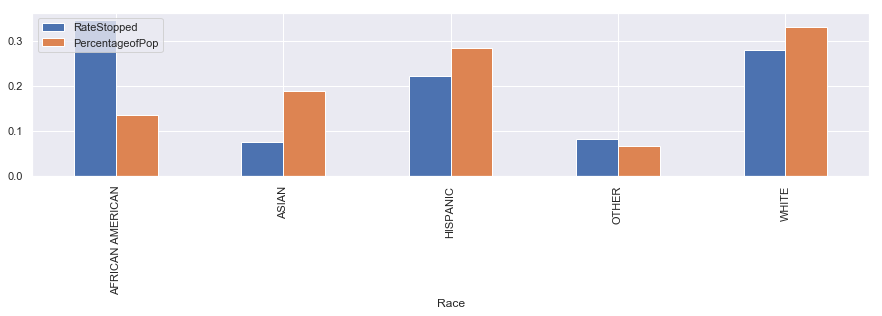

In [20]:
policestoprace_group['Race'] = policestoprace_group.index.values
policestoprace_group.plot(x='Race', y=["RateStopped", "PercentageofPop" ], kind="bar", figsize=(15,3))

Text(0.5, 1.0, 'Percentage searched when stopped by police, by racial group (Search = Driver, Vehicle, or Passenger)')

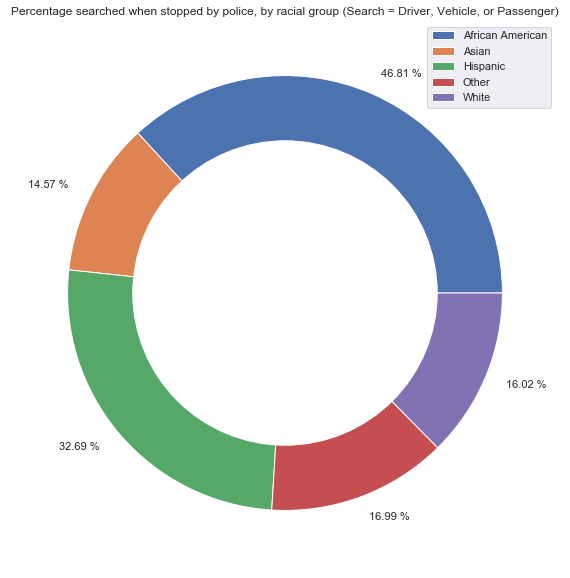

In [21]:
plt.figure(figsize=(15,4))
labels = (policestoprace_group['PercentageSearched'] * 100).round(2).astype(str) + " % "
plt.pie(policestoprace_group['PercentageSearched'], explode = (0, 0, 0, 0, 0), labels = labels)

my_circle=plt.Circle( (0,0), .7, color='white')
p=plt.gcf()
p.set_size_inches(10, 10)
p.gca().add_artist(my_circle)

plt.legend(['African American', 'Asian', 'Hispanic', 'Other', 'White'])
plt.title("Percentage searched when stopped by police, by racial group (Search = Driver, Vehicle, or Passenger)")

African Americans are pulled over at very high rates compared to other racial groups. The most concerning part is that African Americans is that only 29 percent of these police stops result in an arrest or citation, the lowest by far out of any racial group, perhaps suggesting that some of these vehicle stops are not warranted. In addition, every time an African American is stopped by a police vehicle in Sacramento, there is almost a 1/2 chance that they, a fellow passenger, or the vehicle itself will be searched. However, it is important not to jump any conclusions about what this might indicate; more research would have be done to understand the implications of this data. 

## Analyzing Stop Data through Age and Gender

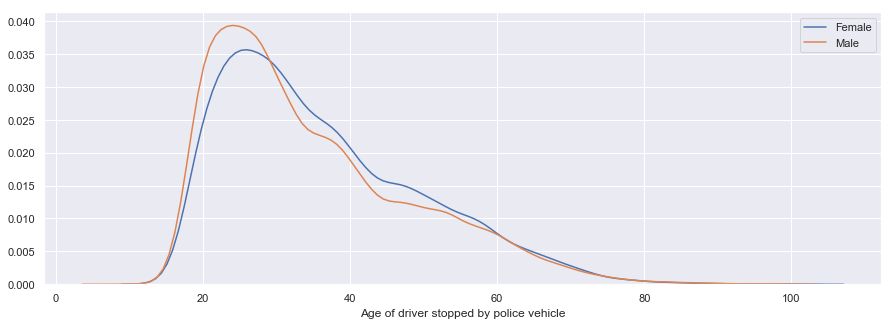

In [16]:
plt.figure(figsize=(15,5))
sns.kdeplot(policestop.loc[policestop['Gender'] == 'F']['Age'], label = 'Female')
sns.kdeplot(policestop.loc[policestop['Gender'] == 'M']['Age'], label = 'Male')
plt.xlabel('Age of driver stopped by police vehicle')
plt.show()

We can see overall, the distributions for age for both females are males are relatively similiar; usually drivers that are around 23-24 are pulled over the most.

Now, let's analyze data specifically for 2018, and use a bar plot to analyze the counts of males and females that were pulled over

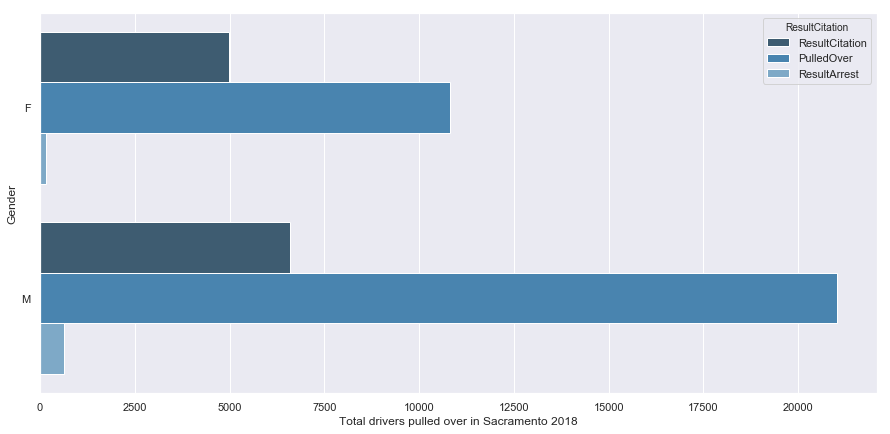

In [17]:
gender = policestop2018.groupby('Gender').agg({'ResultCitation': 'sum', 'Citation': 'size', 'ResultArrest': 'sum'}).rename(columns={'Citation': 'PulledOver'})
gender['Gender'] = gender.index
df = pd.melt(gender, id_vars="Gender", var_name="ResultCitation", value_name="PulledOver")
plt.figure(figsize=(15, 7))
sns.barplot( y='Gender', x='PulledOver', hue='ResultCitation', data=df, palette="Blues_d")
plt.ylabel("Gender")
plt.xlabel("Total drivers pulled over in Sacramento 2018")
plt.show()

Interesting! While men are more likely to be pulled over, the ratio of citation to being stopped by a police vehicle is signficantly higher for females. However, males are more likely to be arrested as a result of being stopped a police vehicle (in 2018).

Below, let's try to go back to temporal data - we will analyze the distribution of the stophour with regards to females and males

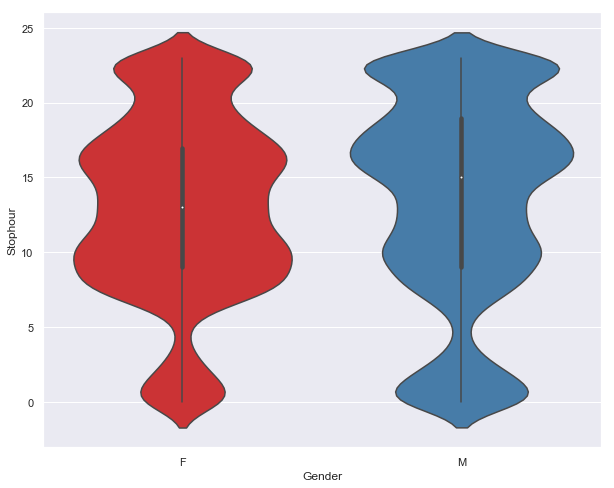

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.violinplot(x='Gender', y='Stophour',data=policestop ,palette="Set1")

According to the violinplot above, males are more likely to be stopped later in the day, based on the median value (around hour 15 versus hour 10 for females). However, males are also much more likely to be stopped early in the day (around hours 0-2).

## Are certain officers less likely to give you a citation, or arrest you?

The OfficerAbra feature is a unique officer identifier, meaning that every officer has their own number. Let's analyze data from 2018, and see if certain officers are less likely to pull you over. We will only include officers that have pulled someone over at least 250 times

In [77]:
vc = policestop2018['OfficerAbra'].value_counts()
vc = vc[vc > 250]
vc.index

Int64Index([3129, 3671, 4093, 3279, 3070, 3602,  472, 4111, 4199, 4514, 4256,
            4425, 4128, 4237, 4527, 4028,  658, 4266, 4090, 4114],
           dtype='int64')

In [92]:
Officer = policestop2018.loc[policestop2018['OfficerAbra'].isin(vc.index)]
Officer = Officer.groupby('OfficerAbra').agg({'ResultCitation': 'sum', 'ResultArrest': 'sum'}).sort_values('ResultCitation', ascending=False)
Officer['TotalStops'] = vc.values
Officer['OfficerNumber'] = Officer.index.values
Officer['ResultCitationPercentage'] = Officer['ResultCitation'] / Officer['TotalStops']
Officer['ResultArrestPercentage'] = Officer['ResultArrest'] / Officer['TotalStops']

Text(0, 0.5, 'Count')

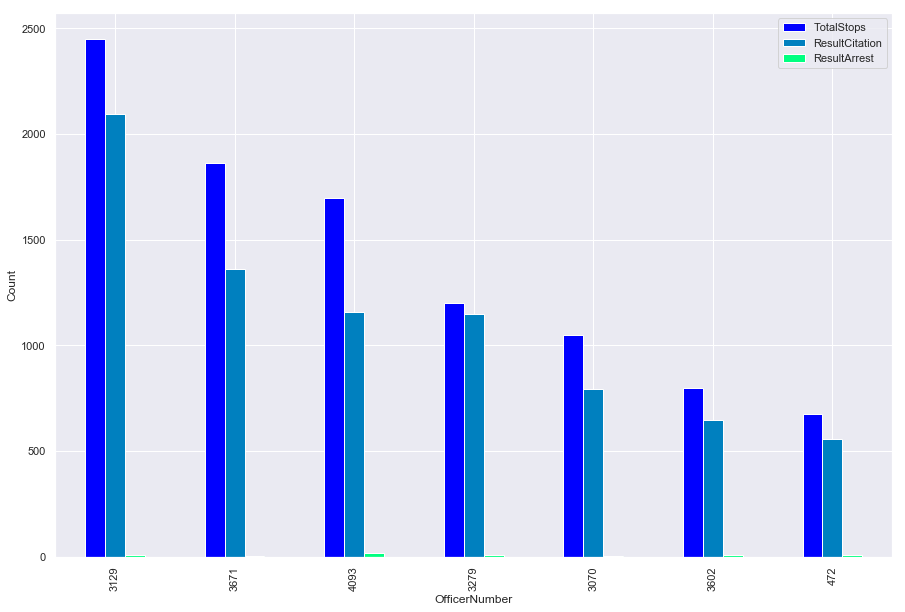

In [104]:
Officer[:7].plot(x='OfficerNumber', y=["TotalStops", "ResultCitation", "ResultArrest"], kind="bar", figsize=(15,10), colormap='winter')
plt.ylabel("Count")

Text(0, 0.5, 'Percentage')

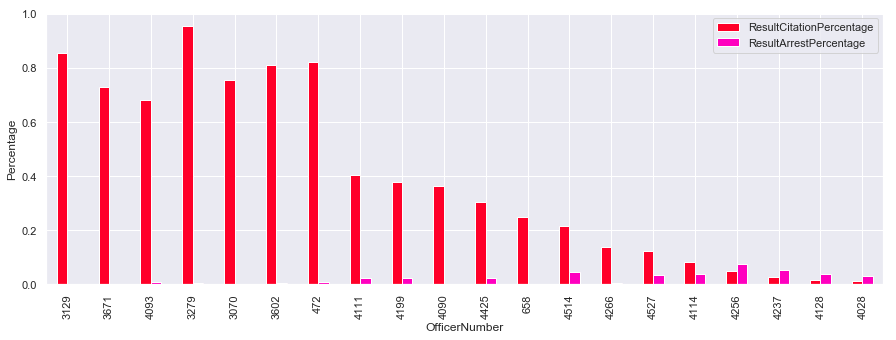

In [105]:
Officer.plot(x='OfficerNumber', y=[ "ResultCitationPercentage", "ResultArrestPercentage"], kind="bar", figsize=(15,5), colormap='gist_rainbow')
plt.ylabel("Percentage")

Interesting! While Officer 3129 is more likely to be the one that pulls you over, officer 3279 is the one that is more likely to give you the citation if you're pulled over. It's interesting how much the citation rate drops after the first five officers, and how result arrest percentage increases with each officer, while the amount of people that are pulled over is fewer. This suggests that certain officers might be more involved with giving citations and the "typical police stop" than other officers.

## EDA Conclusions

There was a lot of great data that was explored here, and it was interesting learning around certain charecteristics of the type of people behing stopped and recieving citations. While there is so much to explore, that's all the EDA I will do for now! In future iterations of this project, I will try to explore even more with different features.